In [268]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
import catboost as ctb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [269]:
df=pd.read_csv("Train.csv")

In [270]:
df.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0


In [271]:
df.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response'],
      dtype='object')

In [272]:
df=df.drop(['Year_of_Birth'],1)

In [273]:
df['Date_Customer']=df['Date_Customer'].astype('datetime64[ns]')

df['Year_Customer']=pd.DatetimeIndex(df['Date_Customer']).year

df['Year_Customer'].unique()

df=df.drop(['Date_Customer'],1)

In [274]:
df['Disposable_Income']=df['Disposable_Income'].fillna(df['Disposable_Income'].mean())
df['Disposable_Income_Log']=np.log(df['Disposable_Income']+1)
df=df.drop(['Disposable_Income'],1)

In [275]:
df.head()

,ID,Education_Level,Marital_Status,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,...,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_Customer,Disposable_Income_Log
0,ID_4A9AR6FQ,Graduation,Divorced,1,1,56,2,1,1,4,...,3,0,0,0,0,0,0,0,2014,11.258103
1,ID_X28T3VEK,Graduation,Together,0,1,17,6,5,1,8,...,6,0,0,0,0,0,0,0,2013,10.947027
2,ID_AWXARH57,Graduation,Single,0,0,17,0,7,4,7,...,2,0,0,0,1,0,0,1,2013,11.549410
3,ID_FQVZHE81,2n Cycle,Single,1,0,49,3,4,1,3,...,8,0,0,0,0,0,0,0,2013,10.743169
4,ID_QVLWGPRN,Graduation,Married,0,0,59,1,3,7,9,...,1,0,0,0,1,0,0,0,2014,11.379245


In [276]:
df2=df.drop(['ID'],1)

In [277]:
df2.head(3)

,Education_Level,Marital_Status,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_Customer,Disposable_Income_Log
0,Graduation,Divorced,1,1,56,2,1,1,4,71,...,3,0,0,0,0,0,0,0,2014,11.258103
1,Graduation,Together,0,1,17,6,5,1,8,205,...,6,0,0,0,0,0,0,0,2013,10.947027
2,Graduation,Single,0,0,17,0,7,4,7,469,...,2,0,0,0,1,0,0,1,2013,11.549410


In [278]:
df2.dtypes

Education_Level             object
Marital_Status              object
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
Response                     int64
Year_Customer                int64
Disposable_Income_Log      float64
dtype: object

In [279]:
df3=df2.drop(['Education_Level','Marital_Status','Year_Customer','Response'],1)

In [280]:
cols=df3.columns

In [281]:
df3.head(3)

,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Disposable_Income_Log
0,1,1,56,2,1,1,4,71,3,16,...,6,20,3,0,0,0,0,0,0,11.258103
1,0,1,17,6,5,1,8,205,22,111,...,15,19,6,0,0,0,0,0,0,10.947027
2,0,0,17,0,7,4,7,469,31,873,...,18,37,2,0,0,0,1,0,0,11.549410


In [282]:
scaler=StandardScaler()
df3=scaler.fit_transform(df3)
Numerical_Data=pd.DataFrame(df3)
Numerical_Data.columns=cols

In [283]:
Numerical_Data.head(3)

,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Disposable_Income_Log
0,0.998801,0.923845,0.020543,-0.151131,-1.082374,-0.547512,-0.522607,-0.682846,-0.659651,-0.653007,...,-0.509256,-0.460283,-0.942970,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,0.646690
1,-0.852404,0.923845,-1.334619,1.913997,0.360178,-0.547512,0.704570,-0.288766,-0.179283,-0.245885,...,-0.288909,-0.479672,0.272965,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,0.037201
2,-0.852404,-0.914466,-1.334619,-1.183695,1.081454,0.438512,0.397776,0.487629,0.048259,3.019658,...,-0.215460,-0.130667,-1.348282,-0.280008,-0.280008,-0.295599,3.811135,-0.113666,-0.091434,1.217447


In [284]:
df2['Marital_Status']=df2['Marital_Status'].astype('category')
df2['Education_Level']=df2['Education_Level'].astype('category')
df2['Year_Customer']=df2['Year_Customer'].astype('category')

In [285]:
Categorical_Data=df2[['Marital_Status','Education_Level','Year_Customer']]

In [286]:
encoders=ce.TargetEncoder()
Target_Response=df2['Response']
encoders.fit_transform(Categorical_Data,Target_Response)
Categorical_Data=encoders.transform(Categorical_Data)

C:\Users\USER\Anaconda3new\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [287]:
Categorical_Data

,Marital_Status,Education_Level,Year_Customer
0,0.201258,0.143392,0.096606
1,0.100244,0.143392,0.129808
2,0.215805,0.143392,0.129808
3,0.215805,0.098592,0.129808
4,0.126829,0.143392,0.096606
...,...,...,...
1563,0.126829,0.143392,0.096606
1564,0.215805,0.143392,0.129808
1565,0.126829,0.154472,0.129808
1566,0.215805,0.208824,0.096606


In [288]:
X=Numerical_Data
X['Marital_Status']=Categorical_Data['Marital_Status']
X['Education_Level']=Categorical_Data['Education_Level']
X['Year_Customer']=Categorical_Data['Year_Customer']

X

,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,...,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Disposable_Income_Log,Marital_Status,Education_Level,Year_Customer
0,0.998801,0.923845,0.020543,-0.151131,-1.082374,-0.547512,-0.522607,-0.682846,-0.659651,-0.653007,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,0.646690,0.201258,0.143392,0.096606
1,-0.852404,0.923845,-1.334619,1.913997,0.360178,-0.547512,0.704570,-0.288766,-0.179283,-0.245885,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,0.037201,0.100244,0.143392,0.129808
2,-0.852404,-0.914466,-1.334619,-1.183695,1.081454,0.438512,0.397776,0.487629,0.048259,3.019658,...,-0.280008,-0.280008,-0.295599,3.811135,-0.113666,-0.091434,1.217447,0.215805,0.143392,0.129808
3,0.998801,-0.914466,-0.222691,0.365151,-0.000460,-0.547512,-0.829401,-0.726959,-0.356261,-0.511586,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,-0.362218,0.215805,0.098592,0.129808
4,-0.852404,-0.914466,0.124786,-0.667413,-0.361098,1.424536,1.011365,0.319998,2.222556,1.185468,...,-0.280008,-0.280008,-0.295599,3.811135,-0.113666,-0.091434,0.884045,0.126829,0.143392,0.096606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,0.998801,0.923845,-1.091385,-0.151131,-0.721736,-0.876186,-0.829401,-0.806363,-0.634369,-0.678720,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,-0.101853,0.126829,0.143392,0.096606
1564,-0.852404,0.923845,0.263777,-0.667413,-0.000460,-0.218837,0.704570,-0.400520,0.604475,-0.293026,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,0.561060,0.215805,0.143392,0.129808
1565,-0.852404,0.923845,0.646002,0.881433,-0.721736,-0.218837,1.011365,1.519882,-0.457391,-0.494444,...,-0.280008,3.571328,-0.295599,-0.262389,-0.113666,-0.091434,0.729665,0.126829,0.154472,0.129808
1566,0.998801,0.923845,-0.952394,-0.151131,-1.082374,-0.876186,-0.522607,-0.724018,-0.659651,-0.683005,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,0.102273,0.215805,0.208824,0.096606


In [289]:
mean_impute=X['Disposable_Income_Log'].mean()
#df['Disposable_Income']=df['Disposable_Income'].fillna(df['Disposable_Income'].mean())
X['Disposable_Income_Log']=X['Disposable_Income_Log'].fillna(mean_impute)

In [290]:
X.describe()

,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,...,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Disposable_Income_Log,Marital_Status,Education_Level,Year_Customer
count,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,...,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1568.000000,1568.000000,1568.000000
mean,5.466149e-17,-1.636304e-16,3.405722e-17,1.791368e-17,2.173715e-17,-1.925897e-17,1.883414e-17,-4.269544e-17,3.547332e-17,-9.771095e-17,...,-8.755043e-16,1.373618e-16,-4.022434e-16,4.078370e-17,4.835453e-16,6.919423e-17,7.904675e-16,0.151722,0.152423,0.152423
std,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,...,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,0.051990,0.037160,0.062879
min,-8.524043e-01,-9.144656e-01,-1.682096e+00,-1.183695e+00,-1.443012e+00,-8.761862e-01,-1.749784e+00,-8.769447e-01,-6.596513e-01,-7.215749e-01,...,-2.800079e-01,-2.800079e-01,-2.955988e-01,-2.623890e-01,-1.136657e-01,-9.143374e-02,-6.444839e+00,0.100244,0.026316,0.096606
25%,-8.524043e-01,-9.144656e-01,-8.481505e-01,-6.674130e-01,-7.217359e-01,-8.761862e-01,-8.294011e-01,-8.122450e-01,-6.343687e-01,-6.572925e-01,...,-2.800079e-01,-2.800079e-01,-2.955988e-01,-2.623890e-01,-1.136657e-01,-9.143374e-02,-5.629685e-01,0.100244,0.143392,0.129808
50%,-8.524043e-01,-9.144656e-01,2.054282e-02,-1.511310e-01,-3.610980e-01,-2.188369e-01,-2.158126e-01,-4.005202e-01,-4.573911e-01,-4.473035e-01,...,-2.800079e-01,-2.800079e-01,-2.955988e-01,-2.623890e-01,-1.136657e-01,-9.143374e-02,1.900526e-01,0.126829,0.143392,0.129808
75%,9.988006e-01,9.238447e-01,8.544884e-01,3.651510e-01,7.208160e-01,4.385123e-01,7.045703e-01,5.773263e-01,1.746719e-01,2.726588e-01,...,-2.800079e-01,-2.800079e-01,-2.955988e-01,-2.623890e-01,-1.136657e-01,-9.143374e-02,7.344572e-01,0.201258,0.154472,0.129808
max,2.850005e+00,2.762155e+00,1.757929e+00,6.560535e+00,8.294213e+00,8.326704e+00,2.238542e+00,3.513807e+00,4.371570e+00,6.670896e+00,...,3.571328e+00,3.571328e+00,3.382964e+00,3.811135e+00,8.797727e+00,1.093688e+01,5.220210e+00,0.406522,0.208824,0.266289


In [291]:
y=Target_Response

In [292]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [293]:
X_test

,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,...,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Disposable_Income_Log,Marital_Status,Education_Level,Year_Customer
1535,0.998801,-0.914466,1.653686,-0.151131,-0.361098,-0.876186,-0.522607,-0.821068,-0.634369,-0.635865,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,-0.743943,0.126829,0.143392,0.096606
983,-0.852404,0.923845,-1.473610,-0.667413,0.720816,2.081886,0.397776,1.578700,1.185973,0.906911,...,-0.280008,3.571328,-0.295599,-0.262389,-0.113666,-0.091434,1.061662,0.126829,0.143392,0.096606
432,0.998801,-0.914466,1.028227,-0.667413,-0.721736,-0.876186,-0.829401,-0.812245,-0.583804,-0.644436,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,-0.641726,0.201258,0.154472,0.129808
962,0.998801,-0.914466,0.854488,-0.151131,-0.721736,-0.876186,-0.829401,-0.774013,-0.583804,-0.635865,...,3.571328,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,-0.740676,0.126829,0.143392,0.129808
976,0.998801,-0.914466,-0.118448,-0.151131,-0.721736,-0.876186,-0.829401,-0.850477,-0.558521,-0.644436,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,-1.147330,0.100244,0.143392,0.129808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,-0.852404,-0.914466,-1.056637,-0.667413,-0.721736,2.410560,1.318159,-0.056436,3.688942,-0.404449,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,0.680285,0.215805,0.098592,0.129808
1383,0.998801,0.923845,1.271461,-0.151131,-0.361098,-0.547512,-0.522607,-0.479924,-0.659651,-0.678720,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,0.482167,0.100244,0.154472,0.129808
1310,-0.852404,0.923845,1.723182,0.881433,0.720816,-0.547512,-0.522607,-0.312293,-0.533239,-0.494444,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,-0.170655,0.126829,0.143392,0.266289
1510,-0.852404,0.923845,0.263777,0.881433,-0.361098,0.438512,1.624953,2.328627,-0.356261,-0.310168,...,-0.280008,3.571328,-0.295599,-0.262389,-0.113666,-0.091434,0.698066,0.126829,0.143392,0.129808


In [294]:
LogisticModel=LogisticRegression()
LogisticModel.fit(X_train,y_train)
LogisticModel.score(X_test,y_test)

0.89171974522293

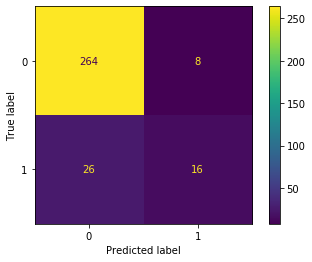

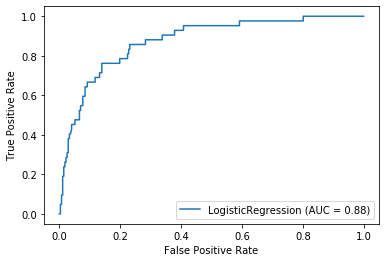

In [295]:
plot_confusion_matrix(LogisticModel,X_test, y_test)
metrics.plot_roc_curve(LogisticModel, X_test, y_test)
plt.show()

In [296]:
ypred=LogisticModel.predict(X_test)
print (f1_score(y_test, ypred, average='micro'))
print (f1_score(y_test, ypred, average='macro'))
print (f1_score(y_test, ypred, average='weighted'))

0.89171974522293
0.7121751321039578
0.8786882813675206


In [297]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.880667 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.880133 (0.023699) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.880400 (0.023741) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.880667 (0.023419) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.879611 (0.023457) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.879611 (0.023457) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.880142 (0.023101) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.877746 (0.021583) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.877481 (0.021591) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.878811 (0.020992) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.879350 (0.020145) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.879350 (0.020145) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.879886 (0.020977) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.867638 (0.014778) wit

In [298]:
LogisticModel1=LogisticRegression(C=100, penalty='l2',solver='liblinear')
LogisticModel1.fit(X_train,y_train)
LogisticModel1.score(X_test,y_test)

0.8789808917197452

In [1]:
pip install imbalanced-learn

  Using cached https://files.pythonhosted.org/packages/b1/bd/4bb46fb4d317fd0f19aa7463d8906598e5fee073c0842b57cb112f023a45/imbalanced_learn-0.8.1-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


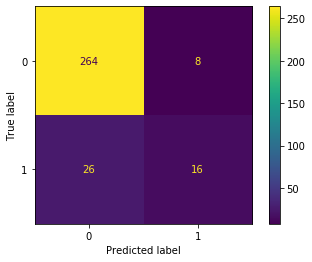

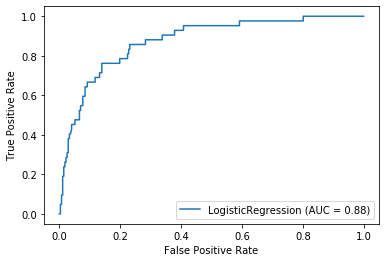

In [299]:
plot_confusion_matrix(LogisticModel,X_test, y_test)
metrics.plot_roc_curve(LogisticModel, X_test, y_test)
plt.show()

In [300]:
ypred=LogisticModel1.predict(X_test)
print (f1_score(y_test, ypred, average='micro'))
print (f1_score(y_test, ypred, average='macro'))
print (f1_score(y_test, ypred, average='weighted'))

0.8789808917197452
0.7019384492406076
0.8702019276298706


In [301]:
CBC=ctb.CatBoostClassifier()
CBC.fit(X_train,y_train)
CBC.score(X_test,y_test)

Learning rate set to 0.011348
0:	learn: 0.6839824	total: 549ms	remaining: 9m 8s
1:	learn: 0.6757509	total: 556ms	remaining: 4m 37s
2:	learn: 0.6673686	total: 564ms	remaining: 3m 7s
3:	learn: 0.6604963	total: 571ms	remaining: 2m 22s
4:	learn: 0.6518588	total: 579ms	remaining: 1m 55s
5:	learn: 0.6418911	total: 586ms	remaining: 1m 37s
6:	learn: 0.6339143	total: 593ms	remaining: 1m 24s
7:	learn: 0.6259999	total: 601ms	remaining: 1m 14s
8:	learn: 0.6189453	total: 609ms	remaining: 1m 7s
9:	learn: 0.6117216	total: 617ms	remaining: 1m 1s
10:	learn: 0.6059859	total: 624ms	remaining: 56.1s
11:	learn: 0.5994744	total: 633ms	remaining: 52.1s
12:	learn: 0.5918318	total: 640ms	remaining: 48.6s
13:	learn: 0.5848184	total: 646ms	remaining: 45.5s
14:	learn: 0.5781920	total: 654ms	remaining: 43s
15:	learn: 0.5696781	total: 660ms	remaining: 40.6s
16:	learn: 0.5625248	total: 666ms	remaining: 38.5s
17:	learn: 0.5563273	total: 672ms	remaining: 36.6s
18:	learn: 0.5501370	total: 678ms	remaining: 35s
19:	learn

162:	learn: 0.2582244	total: 1.71s	remaining: 8.8s
163:	learn: 0.2575937	total: 1.72s	remaining: 8.78s
164:	learn: 0.2568209	total: 1.73s	remaining: 8.78s
165:	learn: 0.2560546	total: 1.74s	remaining: 8.76s
166:	learn: 0.2554748	total: 1.75s	remaining: 8.74s
167:	learn: 0.2546945	total: 1.76s	remaining: 8.71s
168:	learn: 0.2540903	total: 1.77s	remaining: 8.69s
169:	learn: 0.2535115	total: 1.78s	remaining: 8.68s
170:	learn: 0.2529664	total: 1.78s	remaining: 8.65s
171:	learn: 0.2523191	total: 1.79s	remaining: 8.62s
172:	learn: 0.2519374	total: 1.8s	remaining: 8.59s
173:	learn: 0.2515786	total: 1.8s	remaining: 8.56s
174:	learn: 0.2509172	total: 1.81s	remaining: 8.53s
175:	learn: 0.2504566	total: 1.81s	remaining: 8.5s
176:	learn: 0.2498225	total: 1.82s	remaining: 8.46s
177:	learn: 0.2493804	total: 1.83s	remaining: 8.44s
178:	learn: 0.2488615	total: 1.83s	remaining: 8.4s
179:	learn: 0.2483239	total: 1.84s	remaining: 8.38s
180:	learn: 0.2478385	total: 1.84s	remaining: 8.35s
181:	learn: 0.247

335:	learn: 0.1889566	total: 3.38s	remaining: 6.68s
336:	learn: 0.1888024	total: 3.39s	remaining: 6.67s
337:	learn: 0.1885271	total: 3.4s	remaining: 6.66s
338:	learn: 0.1882609	total: 3.41s	remaining: 6.65s
339:	learn: 0.1879946	total: 3.42s	remaining: 6.64s
340:	learn: 0.1878026	total: 3.43s	remaining: 6.63s
341:	learn: 0.1874496	total: 3.44s	remaining: 6.61s
342:	learn: 0.1871930	total: 3.44s	remaining: 6.6s
343:	learn: 0.1869412	total: 3.45s	remaining: 6.58s
344:	learn: 0.1867555	total: 3.46s	remaining: 6.57s
345:	learn: 0.1865870	total: 3.47s	remaining: 6.55s
346:	learn: 0.1864253	total: 3.47s	remaining: 6.54s
347:	learn: 0.1861781	total: 3.48s	remaining: 6.53s
348:	learn: 0.1857833	total: 3.49s	remaining: 6.51s
349:	learn: 0.1855498	total: 3.5s	remaining: 6.5s
350:	learn: 0.1851701	total: 3.5s	remaining: 6.48s
351:	learn: 0.1848586	total: 3.51s	remaining: 6.47s
352:	learn: 0.1845217	total: 3.52s	remaining: 6.45s
353:	learn: 0.1842837	total: 3.53s	remaining: 6.43s
354:	learn: 0.184

515:	learn: 0.1494650	total: 4.62s	remaining: 4.33s
516:	learn: 0.1492080	total: 4.63s	remaining: 4.32s
517:	learn: 0.1490267	total: 4.63s	remaining: 4.31s
518:	learn: 0.1488413	total: 4.64s	remaining: 4.3s
519:	learn: 0.1486988	total: 4.65s	remaining: 4.29s
520:	learn: 0.1485338	total: 4.65s	remaining: 4.28s
521:	learn: 0.1483969	total: 4.66s	remaining: 4.27s
522:	learn: 0.1482476	total: 4.67s	remaining: 4.25s
523:	learn: 0.1481210	total: 4.67s	remaining: 4.24s
524:	learn: 0.1480142	total: 4.68s	remaining: 4.23s
525:	learn: 0.1477501	total: 4.68s	remaining: 4.22s
526:	learn: 0.1475179	total: 4.69s	remaining: 4.21s
527:	learn: 0.1473999	total: 4.69s	remaining: 4.2s
528:	learn: 0.1472017	total: 4.7s	remaining: 4.18s
529:	learn: 0.1470736	total: 4.71s	remaining: 4.17s
530:	learn: 0.1469343	total: 4.71s	remaining: 4.17s
531:	learn: 0.1467522	total: 4.72s	remaining: 4.16s
532:	learn: 0.1466043	total: 4.73s	remaining: 4.15s
533:	learn: 0.1463399	total: 4.74s	remaining: 4.14s
534:	learn: 0.1

688:	learn: 0.1207128	total: 5.94s	remaining: 2.68s
689:	learn: 0.1205221	total: 5.95s	remaining: 2.67s
690:	learn: 0.1203561	total: 5.96s	remaining: 2.66s
691:	learn: 0.1201760	total: 5.96s	remaining: 2.65s
692:	learn: 0.1200792	total: 5.97s	remaining: 2.64s
693:	learn: 0.1199584	total: 5.97s	remaining: 2.63s
694:	learn: 0.1198094	total: 5.98s	remaining: 2.63s
695:	learn: 0.1195842	total: 5.99s	remaining: 2.62s
696:	learn: 0.1193529	total: 5.99s	remaining: 2.6s
697:	learn: 0.1192117	total: 6s	remaining: 2.6s
698:	learn: 0.1189978	total: 6.01s	remaining: 2.59s
699:	learn: 0.1188357	total: 6.01s	remaining: 2.58s
700:	learn: 0.1186492	total: 6.02s	remaining: 2.57s
701:	learn: 0.1185081	total: 6.03s	remaining: 2.56s
702:	learn: 0.1183459	total: 6.04s	remaining: 2.55s
703:	learn: 0.1182311	total: 6.04s	remaining: 2.54s
704:	learn: 0.1180804	total: 6.05s	remaining: 2.53s
705:	learn: 0.1179134	total: 6.05s	remaining: 2.52s
706:	learn: 0.1177955	total: 6.06s	remaining: 2.51s
707:	learn: 0.117

863:	learn: 0.0980054	total: 7.08s	remaining: 1.11s
864:	learn: 0.0978575	total: 7.08s	remaining: 1.1s
865:	learn: 0.0976745	total: 7.09s	remaining: 1.1s
866:	learn: 0.0975577	total: 7.09s	remaining: 1.09s
867:	learn: 0.0974275	total: 7.1s	remaining: 1.08s
868:	learn: 0.0972852	total: 7.11s	remaining: 1.07s
869:	learn: 0.0971953	total: 7.11s	remaining: 1.06s
870:	learn: 0.0970772	total: 7.12s	remaining: 1.05s
871:	learn: 0.0969797	total: 7.13s	remaining: 1.04s
872:	learn: 0.0968707	total: 7.13s	remaining: 1.04s
873:	learn: 0.0967633	total: 7.14s	remaining: 1.03s
874:	learn: 0.0966186	total: 7.14s	remaining: 1.02s
875:	learn: 0.0965246	total: 7.15s	remaining: 1.01s
876:	learn: 0.0963990	total: 7.15s	remaining: 1s
877:	learn: 0.0962976	total: 7.16s	remaining: 995ms
878:	learn: 0.0961391	total: 7.17s	remaining: 986ms
879:	learn: 0.0960672	total: 7.17s	remaining: 978ms
880:	learn: 0.0959485	total: 7.18s	remaining: 969ms
881:	learn: 0.0958073	total: 7.18s	remaining: 961ms
882:	learn: 0.0956

0.8949044585987261

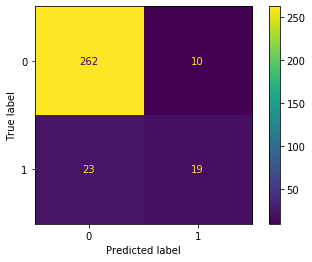

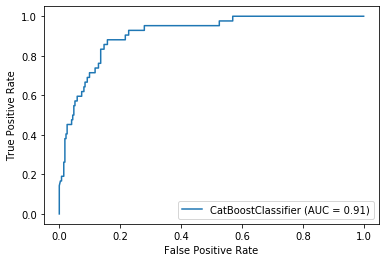

In [303]:
plot_confusion_matrix(CBC,X_test, y_test)
metrics.plot_roc_curve(CBC, X_test, y_test)
plt.show()

In [304]:
ypred=CBC.predict(X_test)
print (f1_score(y_test, ypred, average='micro'))
print (f1_score(y_test, ypred, average='macro'))
print (f1_score(y_test, ypred, average='weighted'))

0.8949044585987261
0.7379826535514704
0.8865094649130705


In [305]:
df_test=pd.read_csv("Test.csv")

In [306]:
df_test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,...,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,...,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,...,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,...,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,...,12,0,200,5,1,0,0,0,0,0


In [307]:
df_test=df_test.drop(['Year_of_Birth'],1)

In [308]:
df_test.head()

,ID,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,Graduation,Single,48556.8,0,1,11-01-2013,85,6,8,...,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,7,...,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,Basic,Married,17025.6,0,0,28-02-2013,47,1,2,...,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,Graduation,Together,91983.6,0,0,16-08-2013,98,1,4,...,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,Graduation,Together,78235.2,0,2,25-07-2013,41,2,7,...,12,0,200,5,1,0,0,0,0,0


In [309]:
df_test['Date_Customer']=df_test['Date_Customer'].astype('datetime64[ns]')

df_test['Year_Customer']=pd.DatetimeIndex(df_test['Date_Customer']).year

df_test['Year_Customer'].unique()

df_test=df_test.drop(['Date_Customer'],1)

df_test['Disposable_Income']=df_test['Disposable_Income'].fillna(df_test['Disposable_Income'].mean())
df_test['Disposable_Income_Log']=np.log(df_test['Disposable_Income']+1)
df_test=df_test.drop(['Disposable_Income'],1)

In [310]:
df_test2=df_test.drop(['ID'],1)

In [311]:
df_test2.head(3)

,Education_Level,Marital_Status,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Year_Customer,Disposable_Income_Log
0,Graduation,Single,0,1,85,6,8,2,8,429,...,41,8,0,0,0,0,0,0,2013,10.790510
1,Graduation,Widow,0,1,79,5,7,4,6,510,...,75,6,0,1,0,0,0,0,2012,10.959544
2,Basic,Married,0,0,47,1,2,0,4,7,...,27,6,0,0,0,0,0,0,2013,9.742532


In [312]:
df_test3=df_test2.drop(['Education_Level','Marital_Status','Year_Customer'],1)

In [313]:
cols=df_test3.columns

In [314]:
df_test3.head(3)

,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Disposable_Income_Log
0,0,1,85,6,8,2,8,429,20,118,...,23,41,8,0,0,0,0,0,0,10.790510
1,0,1,79,5,7,4,6,510,3,26,...,0,75,6,0,1,0,0,0,0,10.959544
2,0,0,47,1,2,0,4,7,10,11,...,12,27,6,0,0,0,0,0,0,9.742532


In [315]:
df_test3=scaler.transform(df_test3)
Numerical_Data_Test=pd.DataFrame(df_test3)
Numerical_Data_Test.columns=cols

In [316]:
Numerical_Data_Test.head(3)

,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Disposable_Income_Log
0,-0.852404,0.923845,1.028227,1.913997,1.442092,-0.218837,0.704570,0.369993,-0.229848,-0.215887,...,-0.093045,-0.053110,1.083589,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,-0.269463
1,-0.852404,0.923845,0.819741,1.397715,1.081454,0.438512,0.090982,0.608206,-0.659651,-0.610152,...,-0.656154,0.606123,0.272965,-0.280008,3.571328,-0.295599,-0.262389,-0.113666,-0.091434,0.061724
2,-0.852404,-0.914466,-0.292187,-0.667413,-0.721736,-0.876186,-0.522607,-0.871063,-0.482674,-0.674434,...,-0.362358,-0.324559,0.272965,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,-2.322765


In [317]:
Categorical_Data_Test=df_test2[['Marital_Status','Education_Level','Year_Customer']]

In [318]:
Categorical_Data_Test=encoders.transform(Categorical_Data_Test)

In [319]:
Categorical_Data_Test

,Marital_Status,Education_Level,Year_Customer
0,0.215805,0.143392,0.129808
1,0.280000,0.143392,0.266289
2,0.126829,0.026316,0.129808
3,0.100244,0.143392,0.129808
4,0.100244,0.143392,0.129808
...,...,...,...
667,0.126829,0.143392,0.266289
668,0.201258,0.143392,0.129808
669,0.126829,0.208824,0.129808
670,0.100244,0.143392,0.129808


In [320]:
X_test=Numerical_Data_Test
X_test['Marital_Status']=Categorical_Data_Test['Marital_Status']
X_test['Education_Level']=Categorical_Data_Test['Education_Level']
X_test['Year_Customer']=Categorical_Data_Test['Year_Customer']

X_test

,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,...,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Disposable_Income_Log,Marital_Status,Education_Level,Year_Customer
0,-0.852404,0.923845,1.028227,1.913997,1.442092,-0.218837,0.704570,0.369993,-0.229848,-0.215887,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,-0.269463,0.215805,0.143392,0.129808
1,-0.852404,0.923845,0.819741,1.397715,1.081454,0.438512,0.090982,0.608206,-0.659651,-0.610152,...,-0.280008,3.571328,-0.295599,-0.262389,-0.113666,-0.091434,0.061724,0.280000,0.143392,0.266289
2,-0.852404,-0.914466,-0.292187,-0.667413,-0.721736,-0.876186,-0.522607,-0.871063,-0.482674,-0.674434,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,-2.322765,0.126829,0.026316,0.129808
3,-0.852404,-0.914466,1.479948,-0.667413,-0.000460,1.424536,1.624953,1.287552,0.933148,3.332499,...,-0.280008,-0.280008,3.382964,3.811135,-0.113666,-0.091434,0.982266,0.100244,0.143392,0.129808
4,-0.852404,2.762155,-0.500673,-0.151131,1.081454,1.095862,1.624953,1.308138,-0.179283,0.054099,...,3.571328,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,0.665078,0.100244,0.143392,0.129808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,-0.852404,0.923845,0.507011,1.397715,1.802730,1.095862,1.931747,1.349310,1.362950,0.208376,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,0.731525,0.126829,0.143392,0.266289
668,-0.852404,0.923845,-0.083700,0.881433,1.081454,2.410560,-0.215813,2.278632,-0.659651,0.349798,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,0.805608,0.201258,0.143392,0.129808
669,-0.852404,-0.914466,-0.570169,-0.667413,0.360178,-0.547512,-0.215813,-0.168190,-0.659651,-0.670149,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,-0.091434,0.270801,0.126829,0.208824,0.129808
670,-0.852404,0.923845,-0.848150,2.430279,-0.000460,1.095862,0.704570,-0.024086,0.832017,0.036957,...,-0.280008,-0.280008,-0.295599,-0.262389,-0.113666,10.936882,0.434478,0.100244,0.143392,0.129808


In [321]:
Prediction=LogisticModel.predict(X_test)

In [322]:
identity=df_test['ID']

In [323]:
Prediction=pd.DataFrame(Prediction,identity)
Prediction.columns=['Response']

In [324]:
Prediction.to_csv("Prediction1.csv")

In [325]:
HyperPrediction=LogisticModel1.predict(X_test)

In [326]:
identity=df_test['ID']

In [327]:
HyperPrediction=pd.DataFrame(HyperPrediction,identity)
HyperPrediction.columns=['Response']

In [328]:
HyperPrediction.to_csv("HyperPrediction1.csv")

In [329]:
CBCPrediction=CBC.predict(X_test)

In [330]:
identity=df_test['ID']

In [331]:
CBCPrediction=pd.DataFrame(HyperPrediction,identity)
CBCPrediction.columns=['Response']

In [332]:
CBCPrediction.to_csv("CBCPrediction1.csv")